While we will have difficulty visualizing the loss function over the complete weight space, we can visualize it over a smaller space to begin to understand our approach. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%precision 1
%matplotlib inline

For the purposes of this visualization, let us consider a small random weight matrix $(2,p)$ for a binary classifier, i.e., one weight vector for each classifier.

We then generate a random input vector $x$ (with 6 parameters, and then a trailing bias) and and a vector of outputs. 

Finally, we randomly select a correct outcome for a binary classifier.

In [2]:
W = np.random.rand(2,7)
x = np.random.randint(2, size=7)
x[6] = 1
correct_class = np.random.randint(2)

In [3]:
W

array([[ 0.3,  0.1,  0.9,  0.6,  0.2,  0.2,  0.2],
       [ 0.8,  0.7,  1. ,  0.8,  0.1,  0.3,  0.9]])

In [4]:
x

array([0, 0, 0, 0, 1, 0, 1])

We then obtain our scores by multiplying 

$$\texttt{scores}=Wx$$

The first score is for our first classifier, the second for the second classifier. A score signifies how likely it is that the given classifier is the correct classifier. 

In [5]:
scores = W.dot(x)
scores

array([ 0.5,  1. ])

Next, we write a loss function for a single input vector. 

In [6]:
from numpy.linalg import norm
def loss_function_i(correct_class,x,W,delta=1.0,gamma=0.1):
    scores = W.dot(x)
    correct_score = scores[correct_class]
    margins = np.maximum(0, scores - correct_score + delta)
    margins[correct_class] = 0
    return np.sum(margins) + gamma*norm(W)

In [7]:
loss_function_i(correct_class,x,W)

1.7

Finally, we vary the loss function for a single input with different weights for a single parameter, `param`. 

In [8]:
def loss_function_in_a_direction(variable_weight,
                                 param,
                                 correct_class,
                                 x,W):
    delta_W = np.zeros(W.shape)
    delta_W[:,param] += int(variable_weight)*W[:,param]
    return loss_function_i(correct_class,x,W+delta_W)

In [9]:
loss_function_in_a_direction(1,1,correct_class,x,W)

1.7

And then plot this function along various values of `variable_weight` for all of our `params` values. 

In [10]:
def plot_loss_function_for_a_single_parameter(plot_axis,param,correct_class,x,W):
    dependent_vector = [loss_function_in_a_direction(variable_weight,
                                                     param,
                                                     correct_class,
                                                     x,W) 
                        for variable_weight in np.linspace(-20,20,200)]
    plot_axis.plot(np.linspace(-20,20,200),dependent_vector)
    
def render_all_plots(correct_class,x,W):
    figure, axes = plt.subplots(1,7, sharex=True, sharey=True, figsize=(20,6))
    for param, axis in zip(range(7),axes):
        plot_loss_function_for_a_single_parameter(axis,param,correct_class,x,W)    

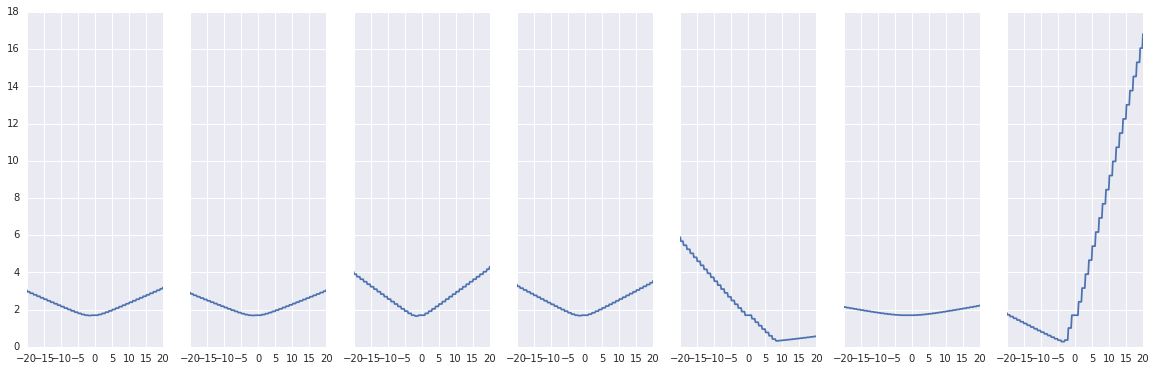

In [11]:
render_all_plots(correct_class,x,W)

It is of note that every parameter is convex and can be minimized. 

In [12]:
def loss_function_in_two_directions(a,p_1,b,p_2,correct_class,x,W):
    delta_W = np.zeros(W.shape)
    delta_W[:,p_1] += int(a)*W[:,p_1]
    delta_W[:,p_2] += int(b)*W[:,p_2]
    return loss_function_i(correct_class,x,W+delta_W)



We can also do the same for a comparison of two varied parameters. Again, note that each of these plots is convex. 

In [13]:
def build_heat_map_for_two_parameters(p_1,p_2,min_val,max_val,nx,correct,x,W):
    X = np.linspace(min_val, max_val, nx)
    Y = np.linspace(min_val, max_val, nx)
    return [[loss_function_in_two_directions(xv,p_1,yv,p_2,correct,x,W)
             for xv in X]
            for yv in Y]

In [14]:
def plot_heatmap(plot_axis,p_1,p_2,correct,x,W):
    this_heat_map = build_heat_map_for_two_parameters(p_1,p_2,-100,100,200,correct,x,W)
    sns.heatmap(this_heat_map,
                cmap='autumn', 
                cbar=False, 
                xticklabels=False, 
                yticklabels=False, 
                vmin=0,vmax=5,
                ax=plot_axis)
    
def render_all_plots(correct_class,x,W):
    plt.figure(figsize=(18,21))
    figure, axes = plt.subplots(7,6, sharex=True, sharey=True, figsize=(18,21))
    for p_1, axes_i in zip(range(7),axes):        
        p_2s = [i for i in range(7)]
        p_2s.remove(p_1) 
        for p_2, axis in zip(p_2s, axes_i):
            plot_heatmap(axis,p_1,p_2,correct_class,x,W)
            axis.set_title("p {} v p {}".format(str(p_1),str(p_2)))


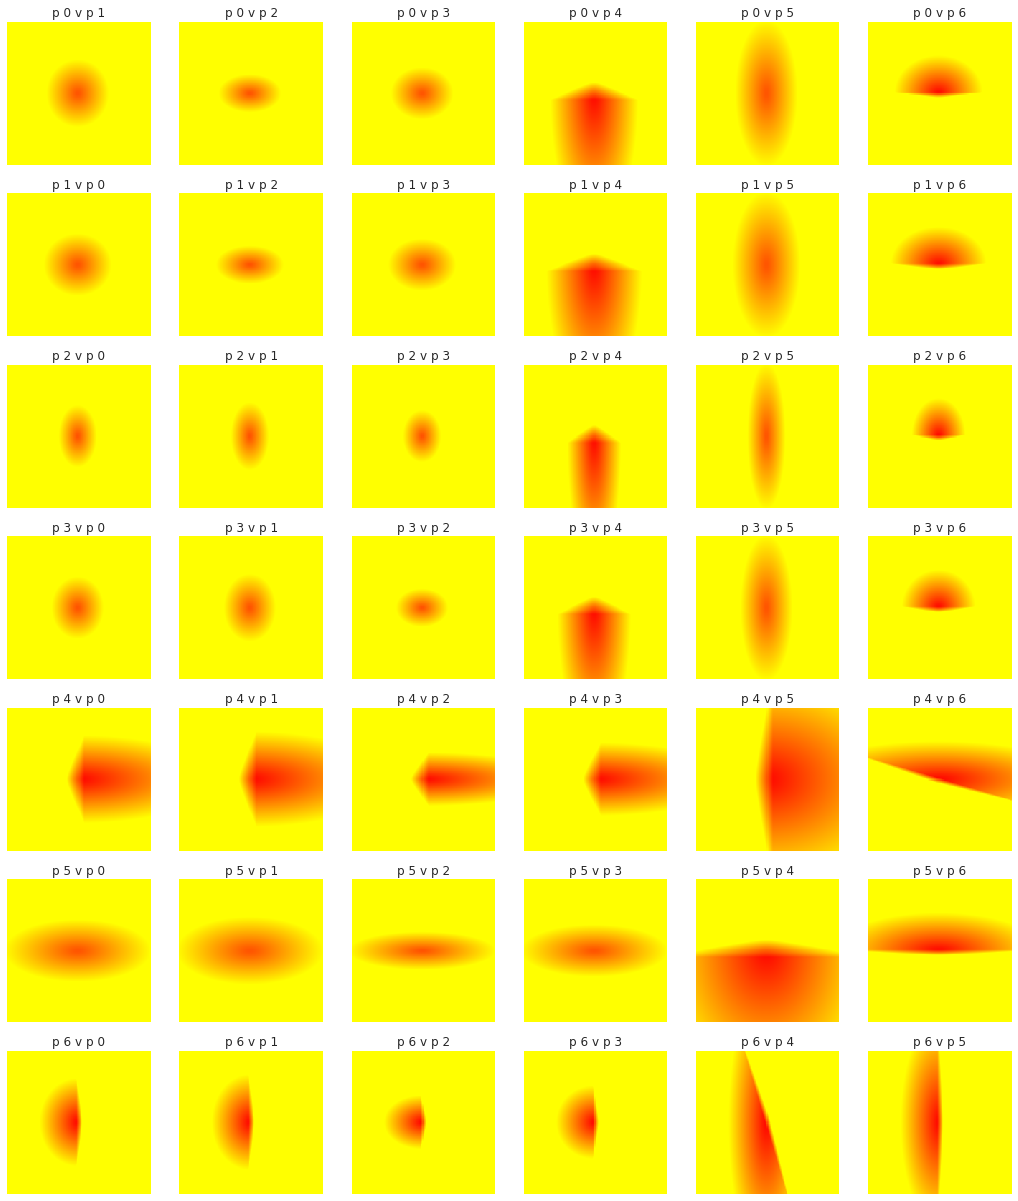

In [15]:
render_all_plots(correct_class,x,W)